In [3]:
import schemdraw
import schemdraw.elements as elm


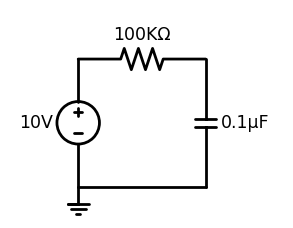

In [5]:
with schemdraw.Drawing() as d:
    d += elm.Resistor().label('100KΩ')
    d += elm.Capacitor().down().label('0.1μF', loc='bottom')
    d += elm.Line().left()
    d += elm.Ground()
    d += elm.SourceV().up().label('10V')

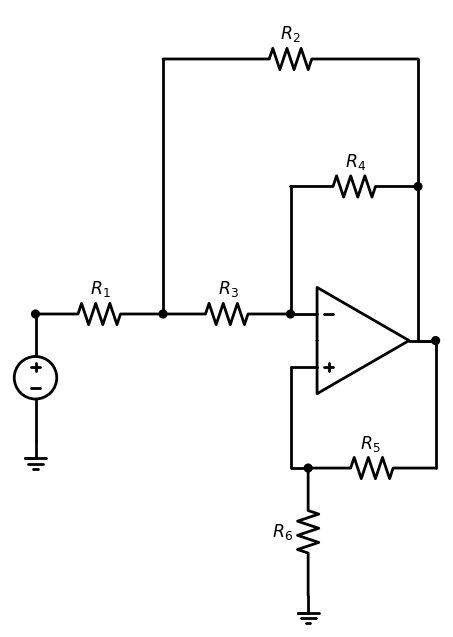

In [106]:
with schemdraw.Drawing() as d:
    d += elm.Ground()
    d += elm.SourceV().dot()
    d += (R1 := elm.Resistor().right().dot().label("$R_1$"))
    d += (R3 := elm.Resistor().at(R1.end).dot().label("$R_3$"))
    d += elm.Line().up()
    d += (R4 := elm.Resistor().right().dot().label("$R_4$"))
    d += (L := elm.Line().up())
    d += elm.Line().at(R1.end).toy(L.end)
    d += (R2 := elm.Resistor().right().tox(L.end).label("$R_2$"))
    d += (op := elm.Opamp(leads=True).at(R3.end).anchor("in1"))
    d += elm.Wire("|-").at(R4.end).to(op.out).dot()
    d += elm.Line().at(op.out).down()
    d += (R5 := elm.Resistor().left().label("$R_5$").dot())
    d += (R6 := elm.Resistor().down().label("$R_6$"))
    d += elm.Ground()
    d += elm.Wire("-|").at(R5.end).to(op.in2)

In [286]:
from collections import namedtuple

VoltageSource = namedtuple('VoltageSource', ['n0', 'n1', 'label'])
Resistor = namedtuple('Resistor', ['n0', 'n1', 'label'])
CurrentSource = namedtuple('CurrentSource', ['n0', 'n1', 'label'])

In [287]:
bassman_tonestack_2 = [
        VoltageSource(1, 0, 1),
        Resistor(1, 2, 1),
        Resistor(1, 3, 1),
        Resistor(2, 3, 1),
        Resistor(3, 4, 1),
        Resistor(2, 4, 1),
        Resistor(4, 0, 1),
    ]

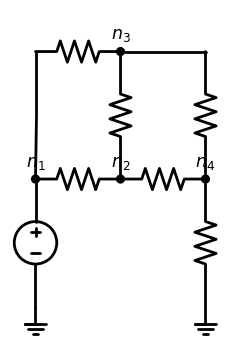

In [189]:
with schemdraw.Drawing() as d:
    d += (N1 := elm.Dot().at((0, 3)).label("$n_1$")).hold
    d += (N2 := elm.Dot().at((2, 3)).label("$n_2$")).hold
    d += (N3 := elm.Dot().at((2, 6)).label("$n_3$")).hold
    d += (N4 := elm.Dot().at((4, 3)).label("$n_4$")).hold
    
    d += elm.Ground()
    d += elm.SourceV().to(N1.center)
    
    d += elm.Resistor().endpoints(N1.center, N2.center)
    
    # We see that we would move diagonally from N1 to N3 directly
    d.here = N1.center
    d += elm.Line().toy(N3.center)
    d += elm.Resistor().to(N3.center)
    
    d += elm.Resistor().endpoints(N2.center, N3.center)
    
    # how do we know we placed N3->N2 and thus can't go down->right?
    # Or that we will place N2->N4 ?
    d.here = N3.center
    d += elm.Line().tox(N4.center)
    d += elm.Resistor().to(N4.center)
    
    d += elm.Resistor().endpoints(N2.center, N4.center)
    
    d += elm.Resistor().down()
    d += elm.Ground()

Point(0.0,3.0)

In [163]:
import jupyter_plz

In [195]:
%plz "write code to generate a schemdraw picture from circuit specification such as: bassman_tonestack_2 = [ \
        VoltageSource(1, 0), \
        Resistor(1, 2), \
        Resistor(1, 3), \
        Resistor(2, 3), \
        Resistor(3, 4), \
        Resistor(2, 4), \
        Resistor(4, 0) ] \
    ] \
The arguments represent start node and end node of the elements"

import schemdraw

d = schemdraw.Drawing()

for element in bassman_tonestack_2:
    d.add(element)

d.draw()

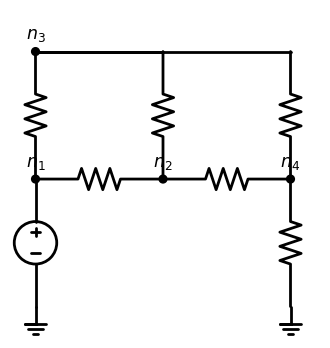

In [198]:
with schemdraw.Drawing() as d:
    d += (N1 := elm.Dot().at((0, 3)).label("$n_1$")).hold
    d += (N2 := elm.Dot().at((3, 3)).label("$n_2$")).hold
    d += (N3 := elm.Dot().at((0, 6)).label("$n_3$")).hold
    d += (N4 := elm.Dot().at((6, 3)).label("$n_4$")).hold
    
    d += elm.Ground()
    d += elm.SourceV().to(N1.center)
    
    d += elm.Resistor().endpoints(N1.center, N2.center)
    d += elm.Resistor().endpoints(N1.center, N3.center)
    
    d.here = N3.center
    d += elm.Line().tox(N2.center)
    d += elm.Resistor().to(N2.center)
    
    # how do we know we placed N3->N2 and thus can't go down->right?
    # Or that we will place N2->N4 ?
    d.here = N3.center
    d += elm.Line().tox(N4.center)
    d += elm.Resistor().to(N4.center)
    
    d += elm.Resistor().endpoints(N2.center, N4.center)
    
    d += elm.Resistor().down()
    d += elm.Ground()

In [288]:
bassman_tonestack_2

[VoltageSource(n0=1, n1=0, label=1),
 Resistor(n0=1, n1=2, label=1),
 Resistor(n0=1, n1=3, label=1),
 Resistor(n0=2, n1=3, label=1),
 Resistor(n0=3, n1=4, label=1),
 Resistor(n0=2, n1=4, label=1),
 Resistor(n0=4, n1=0, label=1)]

In [237]:
import networkx as nx

G = nx.Graph()

for edge in bassman_tonestack_2:
    G.add_edge(edge.n0, edge.n1)

In [238]:
is_planar, emb = nx.check_planarity(G)

In [239]:
nx.combinatorial_embedding_to_pos(emb)

{1: (0, 0), 3: (3, 3), 2: (3, 2), 4: (5, 1), 0: (6, 0)}

In [318]:
def get_nodes(component):
    return [component.n0, component.n1]


def num_nodes(components):
    return len(set(node for component in components for node in get_nodes(component)))

def get_element(component):
    if isinstance(component, Resistor):
        return elm.Resistor()
    elif isinstance(component, VoltageSource):
        return elm.SourceV()
    elif isinstance(component, CurrentSource):
        return elm.SourceI()
    else:
        raise Exception("Uknown component type: ", component)


def create_circuit_diagram(spec):
    G = nx.MultiGraph()
    for edge in spec:
        G.add_edge(edge.n0, edge.n1)
    is_planar, emb = nx.check_planarity(G)
    if not is_planar:
        raise Exception("Unable to create circuit diagram - nonplanar graph")
    positions = nx.combinatorial_embedding_to_pos(emb)
    d = schemdraw.Drawing()
    nodes = []
    for n in range(num_nodes(spec)):
        x, y = positions[n]
        node = elm.Dot().at((x * 2, y * 2)).label(f"$n_{n}$")
        d += node
        nodes.append(node)
    for component in spec:
        n0, n1 = component.n0, component.n1
        el = get_element(component)
        d += el.endpoints(nodes[n0].center, nodes[n1].center)
    d.here = nodes[0].center
    d += elm.Ground()
    return d

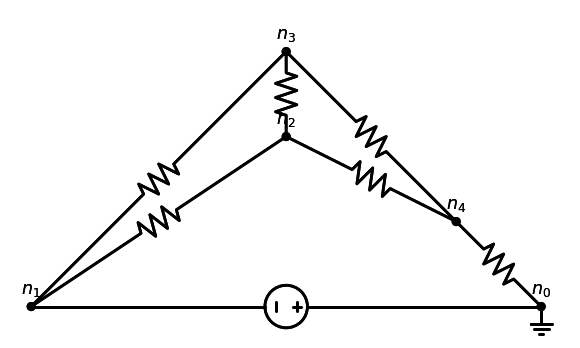

In [319]:
create_circuit_diagram(bassman_tonestack_2)

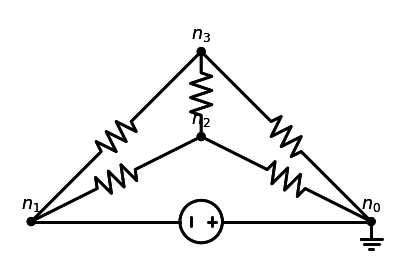

In [299]:
hd5_1 = [
        VoltageSource(1, 0, 1),
        Resistor(1, 2, 1),
        Resistor(1, 3, 1),
        Resistor(2, 3, 1),
        Resistor(2, 0, 1),
        Resistor(3, 0, 1),
    ]

create_circuit_diagram(hd5_1)

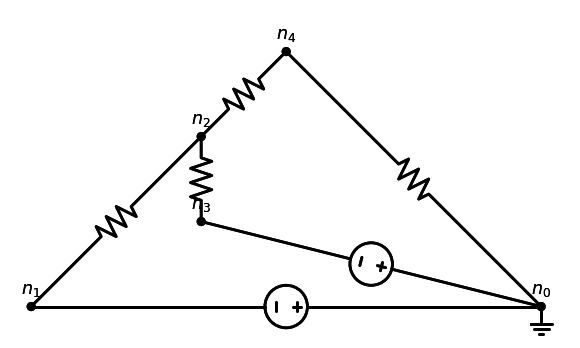

In [300]:
hd2_2 = [
    VoltageSource(1, 0, 2),
    VoltageSource(3, 0, 3),
    Resistor(1, 2, 4),
    Resistor(2, 3, 12),
    Resistor(2, 4, 2),
    Resistor(4, 0, 3)
]
    
create_circuit_diagram(hd2_2)

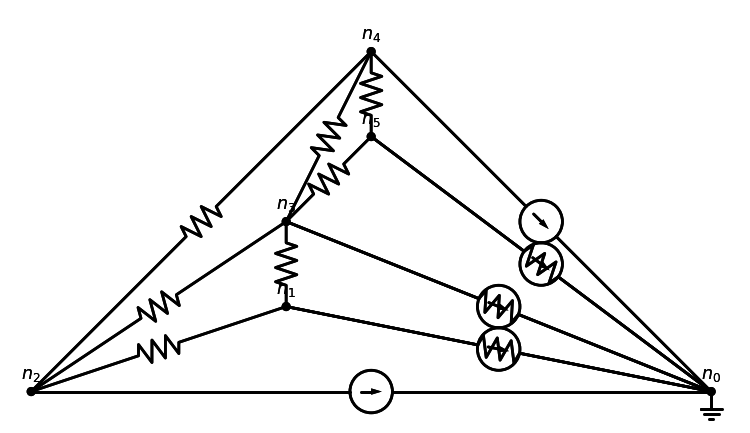

In [301]:
hd2_4 = [
    CurrentSource(2, 0, 3),
    CurrentSource(1, 0, -1),
    CurrentSource(3, 0, -2),
    CurrentSource(5, 0, 4),
    CurrentSource(4, 0, 2),
    Resistor(1, 0, 1),
    Resistor(1, 3, 1 / 2),
    Resistor(1, 2, 1),
    Resistor(2, 3, 1 / 3),
    Resistor(2, 4, 1 / 2),
    Resistor(3, 0, 1),
    Resistor(3, 4, 1),
    Resistor(3, 5, 1 / 3),
    Resistor(4, 5, 1 / 2),
    Resistor(5, 0, 1 / 2),
]

create_circuit_diagram(hd2_4)

In [306]:
G = nx.MultiGraph()

G.add_edge(1, 2)
G.add_edge(1, 2)

1

In [309]:
G.number_of_edges?

Signature: G.number_of_edges(u=None, v=None)
Docstring:
Returns the number of edges between two nodes.

Parameters
----------
u, v : nodes, optional (Gefault=all edges)
    If u and v are specified, return the number of edges between
    u and v. Otherwise return the total number of all edges.

Returns
-------
nedges : int
    The number of edges in the graph.  If nodes `u` and `v` are
    specified return the number of edges between those nodes. If
    the graph is directed, this only returns the number of edges
    from `u` to `v`.

See Also
--------
size

Examples
--------
For undirected multigraphs, this method counts the total number
of edges in the graph::

    >>> G = nx.MultiGraph()
    >>> G.add_edges_from([(0, 1), (0, 1), (1, 2)])
    [0, 1, 0]
    >>> G.number_of_edges()
    3

If you specify two nodes, this counts the total number of edges
joining the two nodes::

    >>> G.number_of_edges(0, 1)
    2

For directed multigraphs, this method can count the total number
of dire

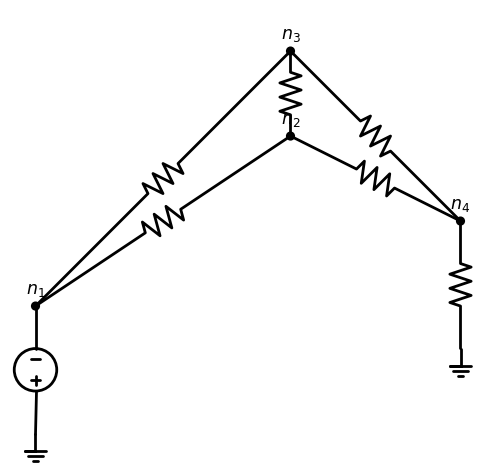

In [240]:
with schemdraw.Drawing() as d:
    d += (N1 := elm.Dot().at((0, 0)).label("$n_1$")).hold
    d += (N2 := elm.Dot().at((6, 4)).label("$n_2$")).hold
    d += (N3 := elm.Dot().at((6, 6)).label("$n_3$")).hold
    d += (N4 := elm.Dot().at((10, 2)).label("$n_4$")).hold
    
    d += elm.Resistor().endpoints(N1.center, N2.center)
    d += elm.Resistor().endpoints(N1.center, N3.center)
    d += elm.Resistor().endpoints(N3.center, N2.center)
    d += elm.Resistor().endpoints(N3.center, N4.center)
    d += elm.Resistor().endpoints(N4.center, N2.center)
    
    d.here = N1.center
    d += elm.SourceV().down()
    d += elm.Ground()
    
    d.here = N4.center
    d += elm.Resistor().down()
    d += elm.Ground()

In [228]:
emb.get_data()

{1: [2, 3], 2: [1, 3, 4], 3: [2, 1, 4], 4: [3, 2]}